<a href="https://colab.research.google.com/github/poursa/NNZHExercises/blob/main/makemore_part1_bigrams_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

words = open('names.txt', 'r').read().splitlines()

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

#Trigram model

In [ ]:
N = torch.zeros((27, 27, 27), dtype=torch.int32)

In [ ]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    N[ix1, ix2, ix3] += 1

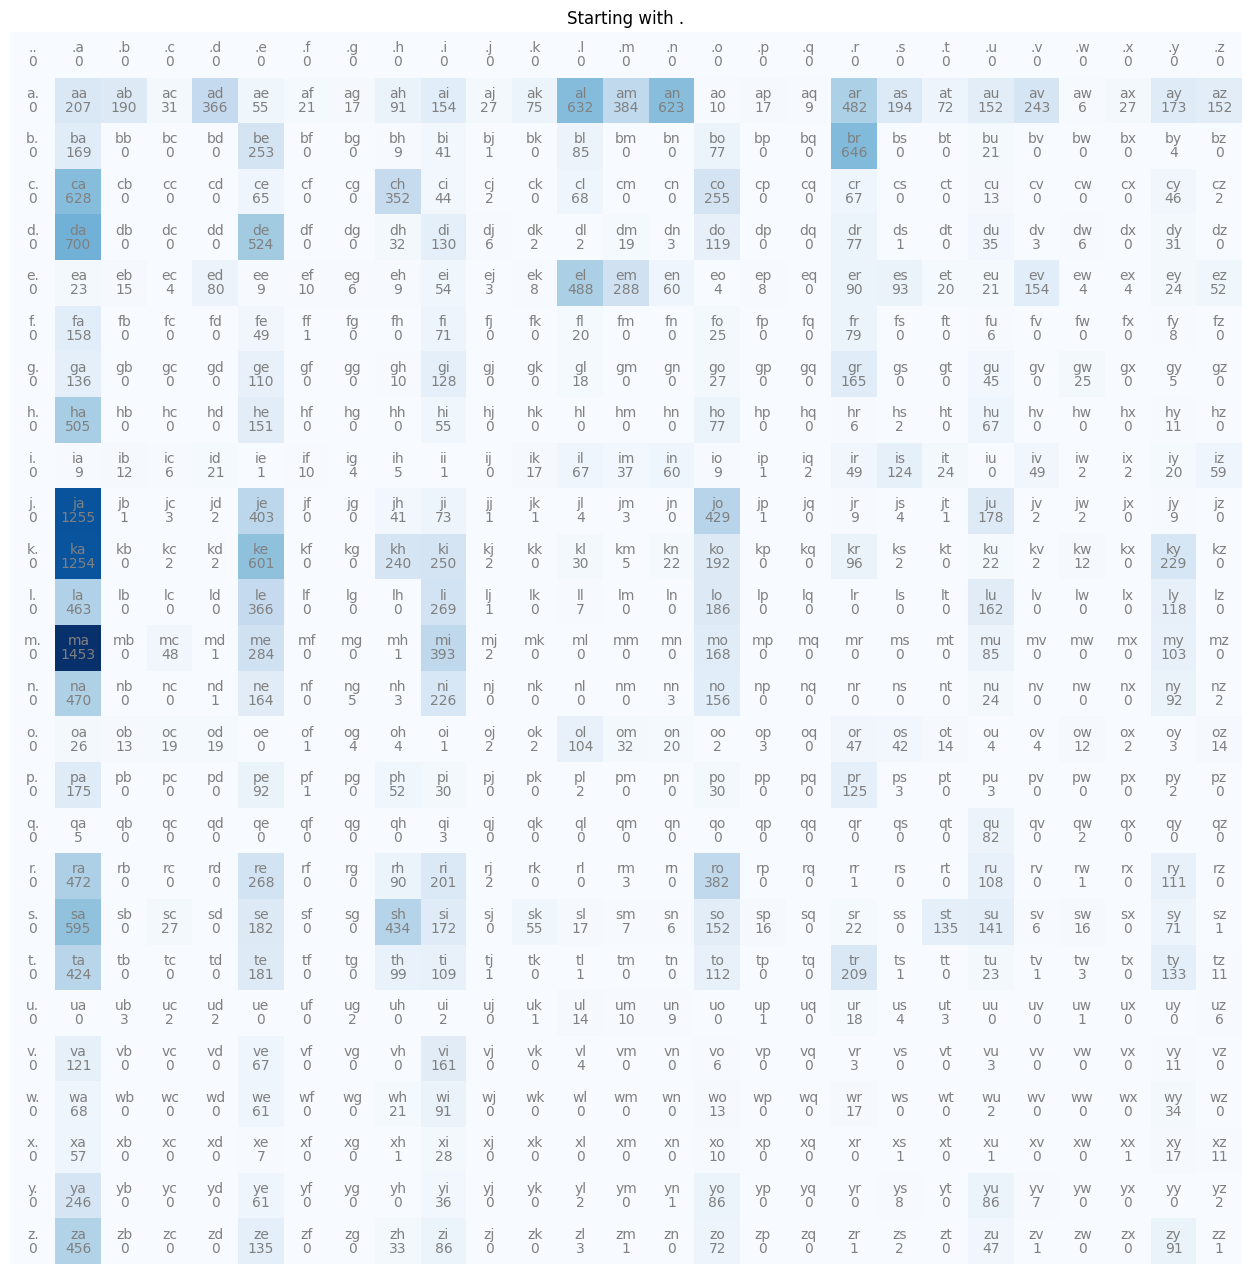

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

initial = 0

plt.figure(figsize=(16,16))
plt.imshow(N[initial], cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[initial, i, j].item(), ha="center", va="top", color='gray')
        plt.title(label = "Starting with " + itos[initial])
plt.axis('off');

In [ ]:
P = (N+1).float()
P /= P.sum(2, keepdims=True)
P.shape

torch.Size([27, 27, 27])

In [ ]:
g = torch.Generator().manual_seed(27579148647)

for i in range(10):
  
  out = []
  initial = 1
  ix = 2
  out.append(itos[initial])
  out.append(itos[ix])
  while True:
    p = P[initial][ix]
    initial = ix
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

aberleest.
abrenrvbgkzxigh.
abellann.
abre.
abiellentvdi.
abroie.
abere.
abpxjmfqamaricari.
ab.
abirlyn.


In [ ]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    prob = P[ix1, ix2, ix3]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-410414.9688)
nll=tensor(410414.9688)
2.092747449874878


# Layer trigram model


In [ ]:
import torch.nn.functional as F


# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    xs.append((ix1,ix2))
    ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()//2
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*2, 27), generator=g, requires_grad=True)

number of examples:  196113


In [ ]:
import torch.nn.functional as F

loss = 0
# gradient descent
for k in range(100):
  
  # forward pass

  xenc = F.one_hot(xs, num_classes=27).float()
  xenc = torch.cat((xenc, xenc),2)[: , 0:1 , :].squeeze(axis=1)# input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  oldloss = loss
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item(), end="")
  if oldloss < loss:
    print("bigger", end="")
  print()
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -10 * W.grad
  

4.164180278778076bigger
3.9074201583862305
3.720216751098633
3.583085536956787
3.473716974258423
3.382838726043701
3.3080639839172363
3.2472124099731445
3.197629928588867
3.1566178798675537
3.121877670288086
3.0917012691497803
3.064931869506836
3.040820598602295
3.0188753604888916
2.9987568855285645
2.9802160263061523
2.96305513381958
2.947113513946533
2.9322564601898193
2.9183666706085205
2.9053471088409424
2.8931093215942383
2.8815805912017822
2.8706960678100586
2.8603999614715576
2.850642681121826
2.8413801193237305
2.8325743675231934
2.824190616607666
2.8161985874176025
2.808570623397827
2.8012804985046387
2.7943077087402344
2.787630796432495
2.7812321186065674
2.7750942707061768
2.769202470779419
2.763542413711548
2.758101463317871
2.7528679370880127
2.747831344604492
2.742981433868408
2.738308906555176
2.7338054180145264
2.7294631004333496
2.725273609161377
2.721230983734131
2.7173283100128174
2.7135589122772217
2.7099170684814453
2.706397771835327
2.702995777130127
2.69970607757

In [ ]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(27579148647)

for i in range(10):
  
  out = []
  initial = 0
  ix = 1
  out.append(itos[ix])
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([initial, ix]), num_classes=27).float()
    xenc1 = torch.cat((xenc, xenc),1)[0]
    initial = ix
    logits = xenc1 @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(0, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

aerl.
aast.
aoricvbajzyig.
ahli.
aran.
ahh.
aaelet.
atven.
arsiedeng.
apygmfq.
